<a href="https://colab.research.google.com/github/Darkunquie/my-projects/blob/main/real%20time%20cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Type of image1_BGR is: <class 'numpy.ndarray'>
Type of image2_BGR is: <class 'numpy.ndarray'>
Type of image3_BGR is: <class 'numpy.ndarray'>

Shape of image1_BGR is: (853, 1280, 3)
Shape of image2_BGR is: (426, 640, 3)
Shape of image3_BGR is: (1256, 1920, 3)

Shape of image1_GRAY is: (853, 1280)
Shape of image2_GRAY is: (426, 640)
Shape of image3_GRAY is: (1256, 1920)

Pixels of GRAY image converted by OpenCV: [25 25 25 24 24 24 24 24 24]
Pixels of GRAY image converted by formula: [24.967 24.967 24.967 23.967 23.967 23.967 23.967 23.967 23.967]
Pixels of GRAY image converted by formula: [25. 25. 25. 24. 24. 24. 24. 24. 24.]
Pixels of GRAY image converted by formula: [25 25 25 24 24 24 24 24 24]


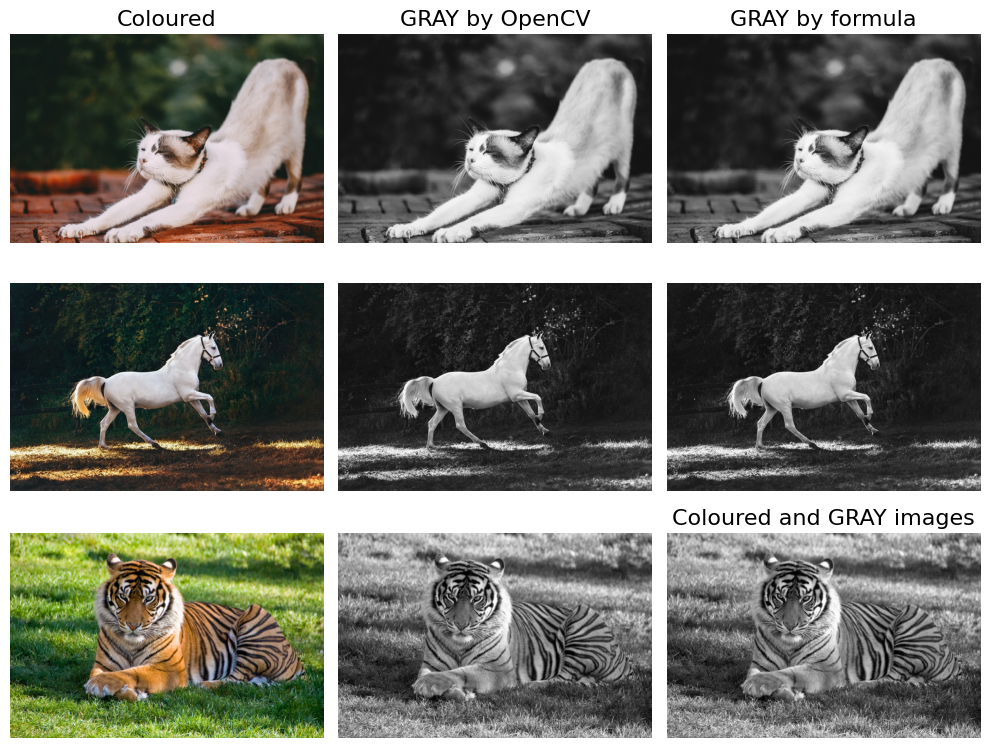


Shape of image1_GRAY: (853, 1280). With pad: (855, 1282)
Shape of image2_GRAY: (426, 640). With pad: (428, 642)
Shape of image3_GRAY: (1256, 1920). With pad: (1258, 1922)

Shape of the filter 1 is: (3, 3)
Shape of the filter 2 is: (3, 3)
Shape of the filter 3 is: (3, 3)

Shape of the output images 1 is: (3, 853, 1280)
Shape of the output images 2 is: (3, 426, 640)
Shape of the output images 3 is: (3, 1256, 1920)


100%|██████████| 1256/1256 [00:58<00:00, 21.32it/s]



Pixels of GRAY image 1 convolved by filter 1: [-99.   3.   3.   1.   0.   0.   0.   0.   0.   0.]
Pixels of GRAY image 1 convolved by filter 1: [-16. -13. -16. -22. -21. -13.  -8.  -7.  -4. 307.]

Pixels of GRAY image 1 convolved by filter 1: [0. 3. 3. 1. 0. 0. 0. 0. 0. 0.]
Pixels of GRAY image 1 convolved by filter 1: [  0.   0.   0.   0.   0.   0.   0.   0.   0. 255.]


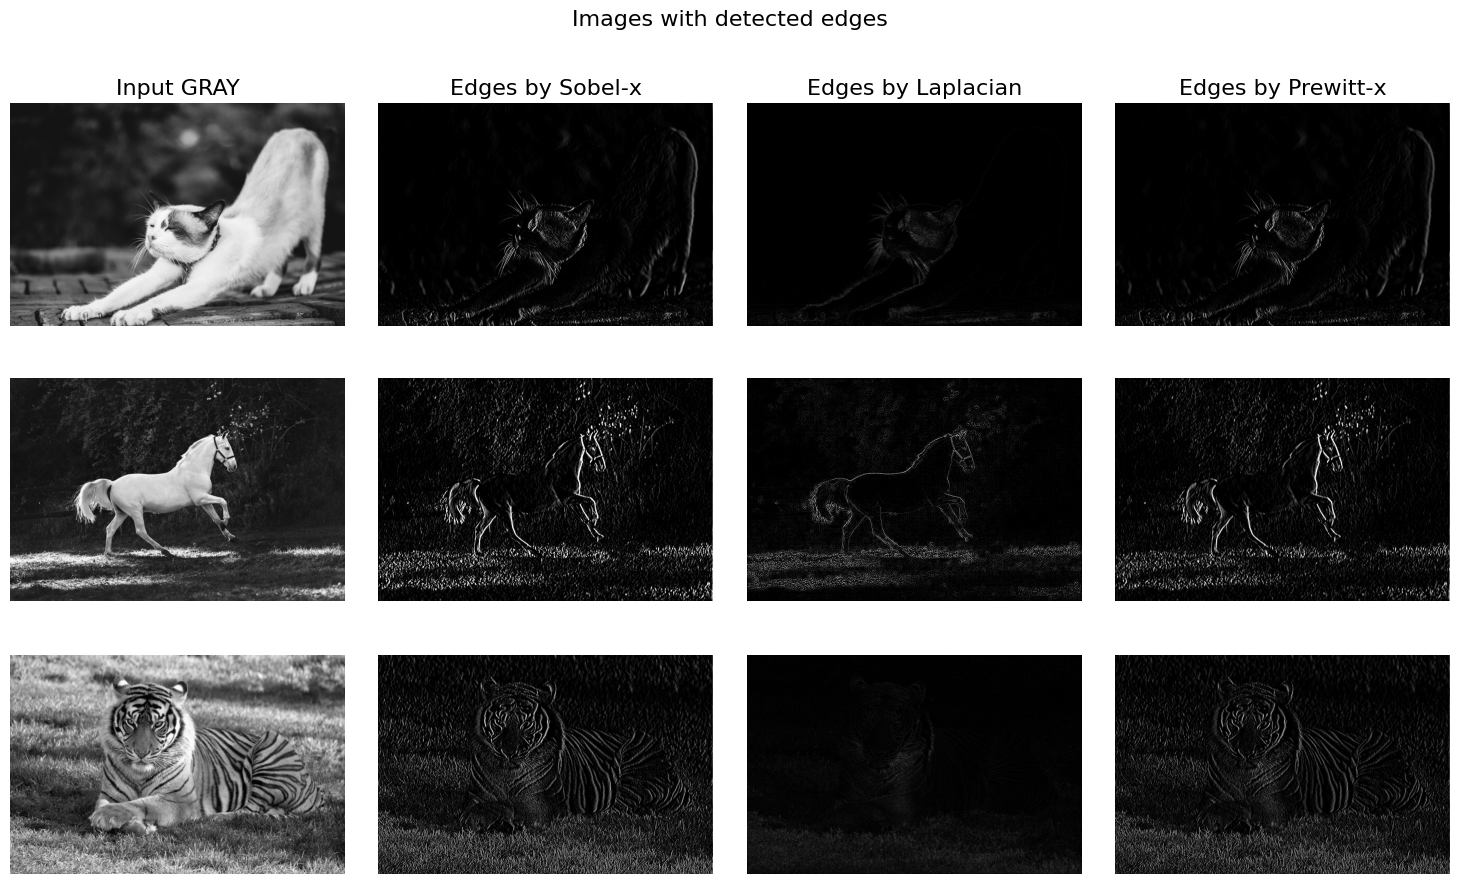

In [7]:


from IPython import get_ipython
from IPython.display import display
# %%


import cv2
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
import os # Import the os module to create directories


image1_BGR = cv2.imread('/content/cat.png')
image2_BGR = cv2.imread('/content/horse.jpg')
image3_BGR = cv2.imread('/content/tiger.bmp')


# Check point
# Showing type of loaded images
print('Type of image1_BGR is:', type(image1_BGR))
print('Type of image2_BGR is:', type(image2_BGR))
print('Type of image3_BGR is:', type(image3_BGR))


# Check point
# Showing shapes of loaded images
print()
print('Shape of image1_BGR is:', image1_BGR.shape)
print('Shape of image2_BGR is:', image2_BGR.shape)
print('Shape of image3_BGR is:', image3_BGR.shape)

"""
End of:
Reading input images
"""


"""
Start of:
Converting images to GRAY
"""

# Converting images to GRAY by OpenCV function
image1_GRAY = cv2.cvtColor(image1_BGR, cv2.COLOR_BGR2GRAY)
image2_GRAY = cv2.cvtColor(image2_BGR, cv2.COLOR_BGR2GRAY)
image3_GRAY = cv2.cvtColor(image3_BGR, cv2.COLOR_BGR2GRAY)


# Check point
# Showing shapes of GRAY images
print()
print('Shape of image1_GRAY is:', image1_GRAY.shape)
print('Shape of image2_GRAY is:', image2_GRAY.shape)
print('Shape of image3_GRAY is:', image3_GRAY.shape)


# Converting images into GRAY by formula
# Y' = 0.299 R + 0.587 G + 0.114 B
image11_GRAY = image1_BGR[:, :, 2] * 0.299 + \
               image1_BGR[:, :, 1] * 0.587 + \
               image1_BGR[:, :, 0] * 0.114

image22_GRAY = image2_BGR[:, :, 2] * 0.299 + \
               image2_BGR[:, :, 1] * 0.587 + \
               image2_BGR[:, :, 0] * 0.114

image33_GRAY = image3_BGR[:, :, 2] * 0.299 + \
               image3_BGR[:, :, 1] * 0.587 + \
               image3_BGR[:, :, 0] * 0.114


# Check point
# Showing pixels' values after conversion by both ways
# Slicing only 10 numbers from first row
print()
print('Pixels of GRAY image converted by OpenCV:', image1_GRAY[0, :9])
print('Pixels of GRAY image converted by formula:', image11_GRAY[0, :9])
# Rounding float numbers
print('Pixels of GRAY image converted by formula:',
      np.around(image11_GRAY[0, :9], decimals=0))
# Making float numbers as integers
# Making float numbers as integers
print('Pixels of GRAY image converted by formula:',
      np.around(image11_GRAY[0, :9], decimals=0).astype(int)) # Changed np.int to int


# Rounding float numbers and making them as integers for all images
image11_GRAY = np.around(image11_GRAY, decimals=0).astype(int) # Changed np.int to int
image22_GRAY = np.around(image22_GRAY, decimals=0).astype(int) # Changed np.int to int
image33_GRAY = np.around(image33_GRAY, decimals=0).astype(int) # Changed np.int to int

"""
End of:
Converting images to GRAY
"""


"""
Start of:
Plotting coloured and GRAY images
"""

# Setting default size of the plot
plt.rcParams['figure.figsize'] = (10.0, 8.0)


# Defining a figure object with number of needed subplots
figure, ax = plt.subplots(nrows=3, ncols=3)
# ax is a (3, 3) Numpy array; to access specific subplot we call it by ax[0, 0]


# Adjusting first column with coloured images
# Converting at the same time images from BGR to RGB
ax[0, 0].imshow(cv2.cvtColor(image1_BGR, cv2.COLOR_BGR2RGB))
ax[1, 0].imshow(cv2.cvtColor(image2_BGR, cv2.COLOR_BGR2RGB))
ax[2, 0].imshow(cv2.cvtColor(image3_BGR, cv2.COLOR_BGR2RGB))


# Adjusting second column with GRAY images converted by OpenCV
ax[0, 1].imshow(image1_GRAY, cmap=plt.get_cmap('gray'))
ax[1, 1].imshow(image2_GRAY, cmap=plt.get_cmap('gray'))
ax[2, 1].imshow(image3_GRAY, cmap=plt.get_cmap('gray'))


# Adjusting third column with GRAY images converted by formula
ax[0, 2].imshow(image11_GRAY, cmap=plt.get_cmap('gray'))
ax[1, 2].imshow(image22_GRAY, cmap=plt.get_cmap('gray'))
ax[2, 2].imshow(image33_GRAY, cmap=plt.get_cmap('gray'))


# Giving names to columns
ax[0, 0].set_title('Coloured', fontsize=16)
ax[0, 1].set_title('GRAY by OpenCV', fontsize=16)
ax[0, 2].set_title('GRAY by formula', fontsize=16)


# Hiding axes to all subplots
for i in range(3):
    for j in range(3):
        ax[i, j].axis('off')


# Adjusting distance between subplots
plt.tight_layout()
# Giving the name to the window with figure
plt.title('Coloured and GRAY images', fontsize=16)

# Showing the plot
plt.show()


image1_GRAY_pad = np.pad(image1_GRAY, (1, 1), mode='constant', constant_values=0)
image2_GRAY_pad = np.pad(image2_GRAY, (1, 1), mode='constant', constant_values=0)
image3_GRAY_pad = np.pad(image3_GRAY, (1, 1), mode='constant', constant_values=0)


# Check point
# Showing shapes of GRAY images
print()
print('Shape of image1_GRAY: {0}. With pad: {1}'.format(image1_GRAY.shape,
                                                        image1_GRAY_pad.shape))
print('Shape of image2_GRAY: {0}. With pad: {1}'.format(image2_GRAY.shape,
                                                        image2_GRAY_pad.shape))
print('Shape of image3_GRAY: {0}. With pad: {1}'.format(image3_GRAY.shape,
                                                        image3_GRAY_pad.shape))

"""
End of:
Setting hyperparameters and applying pad
"""


"""
Start of:
Defining filters (kernels) for edge detection
"""

# Setting common filters (kernels) with size 3x3 for edge detection

# Sobel filter to detect vertical changes on image
filter_1 = np.array([[1, 0, -1],
                     [2, 0, -2],
                     [1, 0, -1]])

# Laplacian filter to detect regions with different brightness on image
filter_2 = np.array([[0, 1, 0],
                     [1, -4, 1],
                     [0, 1, 0]])

# Prewitt filter to detect vertical changes on image
filter_3 = np.array([[1, 0, -1],
                     [1, 0, -1],
                     [1, 0, -1]])


# Check point
# Showing shapes of the filters
print()
print('Shape of the filter 1 is: {0}'.format(filter_1.shape))
print('Shape of the filter 2 is: {0}'.format(filter_2.shape))
print('Shape of the filter 3 is: {0}'.format(filter_3.shape))

"""
End of:
Defining filters (kernels) for edge detection
"""


"""
Start of:
Convolution operation to GRAY images
"""

# Preparing zero valued arrays for convolved output images (feature maps)
# Dimensions are the same with input image according to chosen hyperparameters
# Passing as argument tuple with needed shape
# Extending dimension to store processed images by three filters
output_image1_GRAY = np.zeros(tuple([3]) + image1_GRAY.shape)
output_image2_GRAY = np.zeros(tuple([3]) + image2_GRAY.shape)
output_image3_GRAY = np.zeros(tuple([3]) + image3_GRAY.shape)


# Check point
# Showing shapes of the output images
print()
print('Shape of the output images 1 is: {0}'.format(output_image1_GRAY.shape))
print('Shape of the output images 2 is: {0}'.format(output_image2_GRAY.shape))
print('Shape of the output images 3 is: {0}'.format(output_image3_GRAY.shape))

# Implementing convolution operation to GRAY images

# GRAY image 1
# Sliding through entire input (that is with pad frame) by different filters
# Wrapping the loop with 'tqdm' in order to see progress in real time
for i in tqdm(range(image1_GRAY_pad.shape[0] - 2)):
    for j in range(image1_GRAY_pad.shape[1] - 2):
        # Extracting (slicing) a 3x3 patch (the same size with filter)
        # from input image with pad frame
        patch = image1_GRAY_pad[i:i+3, j:j+3]

        # Applying elementwise multiplication and summation -
        # this is convolution operation
        # When we use '*' with matrices, then elementwise multiplication
        # will be applied

        # With filter_1
        output_image1_GRAY[0, i, j] = np.sum(patch * filter_1)
        # With filter_2
        output_image1_GRAY[1, i, j] = np.sum(patch * filter_2)
        # With filter_3
        output_image1_GRAY[2, i, j] = np.sum(patch * filter_3)


# GRAY image 2
# Sliding through entire input (that is with pad frame) by different filters
# Wrapping the loop with 'tqdm' in order to see progress in real time
for i in tqdm(range(image2_GRAY_pad.shape[0] - 2)):
    for j in range(image2_GRAY_pad.shape[1] - 2):
        # Extracting (slicing) a 3x3 patch (the same size with filter)
        # from input image with pad frame
        patch = image2_GRAY_pad[i:i+3, j:j+3]

        # Applying elementwise multiplication and summation -
        # this is convolution operation
        # When we use '*' with matrices, then elementwise multiplication
        # will be applied

        # With filter_1
        output_image2_GRAY[0, i, j] = np.sum(patch * filter_1)
        # With filter_2
        output_image2_GRAY[1, i, j] = np.sum(patch * filter_2)
        # With filter_3
        output_image2_GRAY[2, i, j] = np.sum(patch * filter_3)


# GRAY image 3
# Sliding through entire input (that is with pad frame) by different filters
# Wrapping the loop with 'tqdm' in order to see progress in real time
for i in tqdm(range(image3_GRAY_pad.shape[0] - 2)):
    for j in range(image3_GRAY_pad.shape[1] - 2):
        # Extracting (slicing) a 3x3 patch (the same size with filter)
        # from input image with pad frame
        patch = image3_GRAY_pad[i:i+3, j:j+3]

        # Applying elementwise multiplication and summation -
        # this is convolution operation
        # When we use '*' with matrices, then elementwise multiplication
        # will be applied

        # With filter_1
        output_image3_GRAY[0, i, j] = np.sum(patch * filter_1)
        # With filter_2
        output_image3_GRAY[1, i, j] = np.sum(patch * filter_2)
        # With filter_3
        output_image3_GRAY[2, i, j] = np.sum(patch * filter_3)


"""
End of:
Convolution operation to GRAY images
"""


"""
Start of:
Excluding non-needed values (less than 0 and more than 255)
"""

# Check point
# Showing pixels' values after convolution
# Slicing only 10 numbers from first row
print()
print('Pixels of GRAY image 1 convolved by filter 1:',
      output_image1_GRAY[0, 1, :10])
print('Pixels of GRAY image 1 convolved by filter 1:',
      output_image1_GRAY[0, 1, 1270:1280])


# To exclude values that are less than 0 and more than 255,
# Numpy function 'clip' is applied
# It keeps values of np array in the given range
# And it replaces non-needed values with boundary numbers
output_image1_GRAY = np.clip(output_image1_GRAY, 0, 255)
output_image2_GRAY = np.clip(output_image2_GRAY, 0, 255)
output_image3_GRAY = np.clip(output_image3_GRAY, 0, 255)


# Check point
# Showing pixels' values after excluding non-needed values
# Slicing only 10 numbers from first row
print()
print('Pixels of GRAY image 1 convolved by filter 1:',
      output_image1_GRAY[0, 1, :10])
print('Pixels of GRAY image 1 convolved by filter 1:',
      output_image1_GRAY[0, 1, 1270:1280])

# Setting default size of the plot
plt.rcParams['figure.figsize'] = (18.0, 10.0)


# Defining a figure object with number of needed subplots
figure, ax = plt.subplots(nrows=3, ncols=4)
# ax is a (3, 4) Numpy array; to access specific subplot we call it by ax[0, 0]


# Adjusting first column with GRAY images
ax[0, 0].imshow(image1_GRAY, cmap=plt.get_cmap('gray'))
ax[1, 0].imshow(image2_GRAY, cmap=plt.get_cmap('gray'))
ax[2, 0].imshow(image3_GRAY, cmap=plt.get_cmap('gray'))


# Adjusting second column with edges by filter 1: Sobel-x
ax[0, 1].imshow(output_image1_GRAY[0], cmap=plt.get_cmap('gray'))
ax[1, 1].imshow(output_image2_GRAY[0], cmap=plt.get_cmap('gray'))
ax[2, 1].imshow(output_image3_GRAY[0], cmap=plt.get_cmap('gray'))


# Adjusting third column with edges by filter 2: Laplacian
ax[0, 2].imshow(output_image1_GRAY[1], cmap=plt.get_cmap('gray'))
ax[1, 2].imshow(output_image2_GRAY[1], cmap=plt.get_cmap('gray'))
ax[2, 2].imshow(output_image3_GRAY[1], cmap=plt.get_cmap('gray'))


# Adjusting fourth column with edges by filter 3: Prewitt-x
ax[0, 3].imshow(output_image1_GRAY[2], cmap=plt.get_cmap('gray'))
ax[1, 3].imshow(output_image2_GRAY[2], cmap=plt.get_cmap('gray'))
ax[2, 3].imshow(output_image3_GRAY[2], cmap=plt.get_cmap('gray'))


# Giving names to columns
ax[0, 0].set_title('Input GRAY', fontsize=16)
ax[0, 1].set_title('Edges by Sobel-x', fontsize=16)
ax[0, 2].set_title('Edges by Laplacian', fontsize=16)
ax[0, 3].set_title('Edges by Prewitt-x', fontsize=16)


# Hiding axes to all subplots
for i in range(3):
    for j in range(4):
        ax[i, j].axis('off')


# Adjusting distance between subplots
plt.tight_layout()
plt.subplots_adjust(left=0.1, right=0.9,
                    bottom=0.1, top=0.9,
                    wspace=0.1, hspace=0.1)


# Saving the plot
# (!) On Windows, the path might look like following:
# r'images\plot_convolution.png'
# or:
# 'images\\plot_convolution.png'
os.makedirs('images', exist_ok=True) # Create the 'images' directory if it doesn't exist
figure.savefig('images/plot_convolution.png')
# Giving name to the window with figure
figure.suptitle('Images with detected edges', fontsize=16)

# Showing the plot
plt.show()


##pooling


In [11]:
!pip install PyQt5  # Install PyQt5
# or
!pip install PySide2  # Install PySide2 instead, if preferred

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 MB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.8/270.8 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.3/164.3 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 975.4/975.4 kB 57.8 MB/s eta 0:00:00


Type of image_BGR is: <class 'numpy.ndarray'>
Shape of image_BGR is: (853, 1280, 3)
Shape of image_GRAY is: (853, 1280)
Shape of image after pooling is: (426, 640)


100%|██████████| 426/426 [00:01<00:00, 276.48it/s]


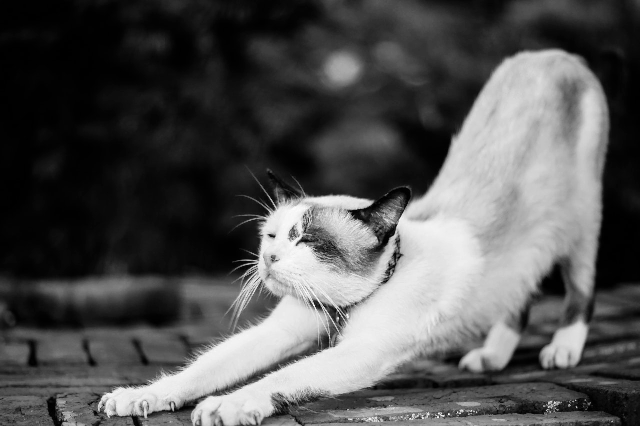

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import io
from IPython.display import Image


matplotlib.use('Agg')  # Using Agg for demonstration

from tqdm import tqdm

image_BGR = cv2.imread('/content/cat.png')
image_GRAY = cv2.cvtColor(image_BGR, cv2.COLOR_BGR2GRAY)
print('Type of image_BGR is:', type(image_BGR))
print('Shape of image_BGR is:', image_BGR.shape)
print('Shape of image_GRAY is:', image_GRAY.shape)

f_pooling = 2
# stride (step) for sliding
step = 2



height_out = int((image_GRAY.shape[0] - 2) / 2 + 1)
width_out = int((image_GRAY.shape[1] - 2) / 2 + 1)
image_after_pooling = np.zeros((height_out, width_out))

print('Shape of image after pooling is:', image_after_pooling.shape)

ii = 0
for i in tqdm(range(0, image_GRAY.shape[0] - f_pooling + 1, step)):
    # Preparing indexes for columns of output array
    jj = 0

    for j in range(0, image_GRAY.shape[1] - f_pooling + 1, step):
        patch = image_GRAY[i:i+f_pooling, j:j+f_pooling]

        image_after_pooling[ii, jj] = np.max(patch)

        jj += 1

    # Increasing indexes for columns of output array
    ii += 1

plt.rcParams['figure.figsize'] = (18.0, 10.0)
figure, ax = plt.subplots(nrows=1, ncols=2,
                          gridspec_kw={'width_ratios': [2, 1]})


ax[0].imshow(image_GRAY, cmap=plt.get_cmap('gray'))


ax[1].imshow(image_after_pooling, cmap=plt.get_cmap('gray'))

ax[0].set_title('Input GRAY', fontsize=16)
ax[1].set_title('After Pooling', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(left=0.1, right=0.9,
                    bottom=0.1, top=0.9,
                    wspace=0.1, hspace=0.1)


figure.savefig('images/plot_pooling.png')
buf = io.BytesIO()

# Save the plot to the BytesIO object using imsave
plt.imsave(buf, image_after_pooling, cmap=plt.get_cmap('gray'))

# Display the image from the BytesIO object in the notebook output
display(Image(buf.getvalue()))
figure.canvas.manager.set_window_title('Pooling operation to GRAY image')
plt.show()




##conv+pooling


In [18]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from tqdm import tqdm


"""
Start of:
Function for 2D convolution
"""


def convolution_2d(feature_map, f, pad=1, step=1):

    # Hyperparameters for 2D convolution:
    # f_size - filter (kernel) size (width and height are equal)
    # step - stride (step) for sliding
    # pad - zero-valued frame around image to process boundaries

    # Output dimension is calculated by following equations:
    # height_out = (height_in - f_size + 2 * pad) / step + 1
    # width_out = (width_in - f_size + 2 * pad) / step + 1

    # Calculating spatial size of output resulted array (width and height)
    # Making output width and height as integer numbers,
    # in case input width/height is odd
    f_size = f.shape[0]  # (width and height are equal)
    height_out = int((feature_map.shape[0] - f_size + 2 * pad) / step + 1)
    width_out = int((feature_map.shape[1] - f_size + 2 * pad) / step + 1)

    # Applying to feature map pad frame with zero values to process boundaries
    # Using Numpy method 'pad'
    feature_map_pad = np.pad(feature_map, (pad, pad),
                             mode='constant',
                             constant_values=0)

    # Preparing zero valued output array for convolved feature map
    output_feature_map = np.zeros((height_out, width_out))

    # Implementing convolution operation to feature map
    # Sliding through entire feature map (that is with pad frame) by filter
    for i in tqdm(range(0, feature_map_pad.shape[0] - f_size + 1, step)):
        for j in range(0, feature_map_pad.shape[1] - f_size + 1, step):
            # Extracting (slicing) a patch (the same size with filter)
            # from feature map with pad frame
            patch = feature_map_pad[i:i+f_size, j:j+f_size]

            # Applying elementwise multiplication and summation -
            # this is convolution operation
            # When we use '*' with matrices, then elementwise multiplication
            # will be applied
            output_feature_map[i, j] = np.sum(patch * f)

    # Returning convolved feature map
    return output_feature_map


"""
End of:
Function for 2D convolution
"""


"""
Start of:
Function to exclude non-needed values (less than 0 and more than 255)
"""


def range_0_255(feature_map):

    # To exclude values that are less than 0 and more than 255,
    # Numpy function 'clip' is applied
    # It keeps values of Numpy array in the given range
    # And it replaces non-needed values with boundary numbers
    output_feature_map = np.clip(feature_map, 0, 255)

    # Returning processed feature map
    return output_feature_map


"""
End of:
Function to exclude non-needed values (less than 0 and more than 255)
"""


"""
Start of:
Function for pooling
"""


def pooling(feature_map, f_pooling=2, step=2):

    # Hyperparameters for pooling:
    # f_pooling - filter size for pooling (width and height are equal)
    # step - stride (step) for sliding

    # Output dimension is calculated by following equations:
    # height_out = (height_in - f_pooling) / step + 1
    # width_out = (width_in - f_pooling) / step + 1

    # Calculating spatial size of output resulted array (width and height)
    # Making output width and height as integer numbers,
    # in case input width/height is odd
    height_out = int((feature_map.shape[0] - 2) / 2 + 1)
    width_out = int((feature_map.shape[1] - 2) / 2 + 1)

    # Preparing zero valued output array for feature map after pooling
    feature_map_after_pooling = np.zeros((height_out, width_out))

    # Implementing pooling operation
    # Preparing indexes for rows of output array
    ii = 0

    # Sliding through entire feature map
    # Wrapping the loop with 'tqdm' in order to see progress in real time
    for i in tqdm(range(0, feature_map.shape[0] - f_pooling + 1, step)):
        # Preparing indexes for columns of output array
        jj = 0

        for j in range(0, feature_map.shape[1] - f_pooling + 1, step):
            # Extracting (slicing) a 2x2 patch (the same size with filter)
            # from feature map
            patch = feature_map[i:i+f_pooling, j:j+f_pooling]

            # Applying max pooling operation - choosing maximum element
            # from the current patch
            feature_map_after_pooling[ii, jj] = np.max(patch)

            # Increasing indexes for rows of output array
            jj += 1

        # Increasing indexes for columns of output array
        ii += 1

    # Returning feature map after pooling
    return feature_map_after_pooling


"""
End of:
Function for pooling
"""


"""
Start of:
Defining filters (kernels) for convolution
"""

# Setting common filters (kernels) with size 3x3 for edge detection

# Sobel filter to detect vertical changes on image
filter_1 = np.array([[1, 0, -1],
                     [2, 0, -2],
                     [1, 0, -1]])

# Laplacian filter to detect regions with different brightness on image
filter_2 = np.array([[0, 1, 0],
                     [1, -4, 1],
                     [0, 1, 0]])

# Prewitt filter to detect vertical changes on image
filter_3 = np.array([[1, 0, -1],
                     [1, 0, -1],
                     [1, 0, -1]])


# Setting random filters (kernels) with size 3x3
# and integer numbers in range [-1, 1]
filter_11 = np.random.randint(low=-1, high=1, size=(3, 3))
filter_22 = np.random.randint(low=-1, high=1, size=(3, 3))
filter_33 = np.random.randint(low=-1, high=1, size=(3, 3))

"""
End of:
Defining filters (kernels) for convolution
"""


"""
Start of:
Reading input image and converting into GRAY
"""

# Reading coloured input image by OpenCV library
# In this way image is opened already as Numpy array

# (!) OpenCV by default reads image in BGR format (order of channels)
# (!) On Windows, the path might look like following:
# r'images\cat.png'
# or:
# 'images\\cat.png'
image_BGR = cv2.imread('/content/cat.png')


# Converting input image to GRAY by OpenCV function
image_GRAY = cv2.cvtColor(image_BGR, cv2.COLOR_BGR2GRAY)

"""
End of:
Reading input image and converting into GRAY
"""


"""
Start of:
Implementing architecture: [C1, P1]-->[C2, P2]-->[C3, P3]
"""

# [C1, P1]
# Applying 2D convolution
c1 = convolution_2d(image_GRAY, filter_1, pad=1, step=1)
# Excluding non-needed values
c1 = range_0_255(c1)
# Applying pooling
c1_p1 = pooling(c1, f_pooling=2, step=2)


# [C2, P2]
# Applying 2D convolution
c2 = convolution_2d(c1_p1, filter_2, pad=1, step=1)
# Excluding non-needed values
c2 = range_0_255(c2)
# Applying pooling
c2_p2 = pooling(c2, f_pooling=2, step=2)


# [C3, P3]
# Applying 2D convolution
c3 = convolution_2d(c2_p2, filter_3, pad=1, step=1)
# Excluding non-needed values
c3 = range_0_255(c3)
# Applying pooling
c3_p3 = pooling(c3, f_pooling=2, step=2)


# Check point
# Showing shape of GRAY image
print('{0} Shape of input GRAY image'.format(image_GRAY.shape))
print()

# Showing shape of feature map after [C1] and [P1]
print('{0} Shape of feature map after [C1]'.format(c1.shape))
print('{0} Shape of feature map after [P1]'.format(c1_p1.shape))
print()

# Showing shape of feature map after [C2] and [P2]
print('{0} Shape of feature map after [C2]'.format(c2.shape))
print('{0} Shape of feature map after [P2]'.format(c2_p2.shape))
print()

# Showing shape of feature map after [C3] and [P3]
print('{0} Shape of feature map after [C3]'.format(c3.shape))
print('{0} Shape of feature map after [P3]'.format(c3_p3.shape))

"""
End of:
Implementing architecture: [C1, P1]-->[C2, P2]-->[C3, P3]
"""


"""
Start of:
Plotting resulted feature maps
"""

# Setting default size of the plot
plt.rcParams['figure.figsize'] = (18.0, 10.0)


# Defining a figure object with number of needed subplots
# ax is a (7,) Numpy array and to access specific subplot we call it by ax[0]
# 'gridspec_kw' is the dictionary with keywords to specify the ratio of subplots
# --------------------------------------------------[I, C1, P1, C2, P2, C3, P3]
figure, ax = plt.subplots(nrows=1, ncols=7,
                          gridspec_kw={'width_ratios': [8, 8, 4, 4, 2, 2, 1]})


# Adjusting first column with input GRAY image
ax[0].imshow(image_GRAY, cmap=plt.get_cmap('gray'))

# Adjusting second column with feature map after C1
ax[1].imshow(c1, cmap=plt.get_cmap('gray'))

# Adjusting third column with feature map after P1
ax[2].imshow(c1_p1, cmap=plt.get_cmap('gray'))

# Adjusting fourth column with feature map after C2
ax[3].imshow(c2, cmap=plt.get_cmap('gray'))

# Adjusting fifth column with feature map after P2
ax[4].imshow(c2_p2, cmap=plt.get_cmap('gray'))

# Adjusting sixth column with feature map after C3
ax[5].imshow(c3, cmap=plt.get_cmap('gray'))

# Adjusting seventh column with feature map after P3
ax[6].imshow(c3_p3, cmap=plt.get_cmap('gray'))


# Giving names to columns
ax[0].set_title('Input GRAY', fontsize=12)
ax[1].set_title('C1', fontsize=12)
ax[2].set_title('P1', fontsize=12)
ax[3].set_title('C2', fontsize=12)
ax[4].set_title('P2', fontsize=12)
ax[5].set_title('C3', fontsize=12)
ax[6].set_title('P3', fontsize=12)


# Hiding axes to all subplots
for a in range(7):
    ax[a].axis('off')


# Adjusting distance between subplots
plt.tight_layout()
plt.subplots_adjust(left=0.1, right=0.9,
                    bottom=0.1, top=0.9,
                    wspace=0.1, hspace=0.1)


# Saving the plot
# (!) On Windows, the path might look like following:
# r'images\plot_pooling.png'
# or:
# 'images\\plot_pooling.png'
figure.savefig('images/plot_convolution_and_pooling.png')

figure.suptitle('Pooling operation to GRAY image', fontsize=16) # Added this line

plt.show()




100%|██████████| 106/106 [00:00<00:00, 1200.07it/s]


(853, 1280) Shape of input GRAY image

(853, 1280) Shape of feature map after [C1]
(426, 640) Shape of feature map after [P1]

(426, 640) Shape of feature map after [C2]
(213, 320) Shape of feature map after [P2]

(213, 320) Shape of feature map after [C3]
(106, 160) Shape of feature map after [P3]


Type of image_BGR is: <class 'numpy.ndarray'>
Shape of image_BGR is: (853, 1280, 3)
Shape of image_GRAY is: (853, 1280)
Shape of image after pooling is: (426, 640)


100%|██████████| 426/426 [00:02<00:00, 163.02it/s]


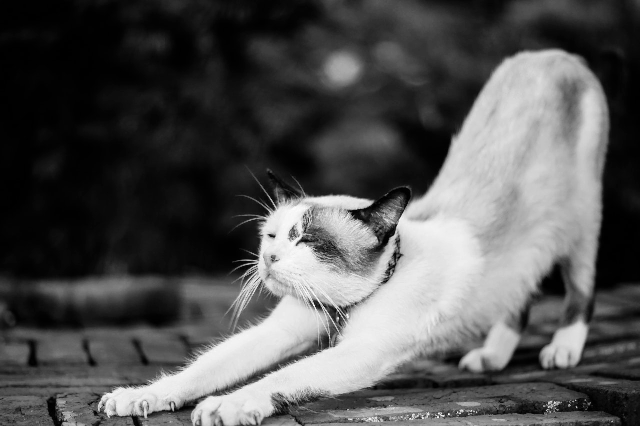

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import io
from IPython.display import Image

# matplotlib.use('Agg')  # Remove this line

from tqdm import tqdm

image_BGR = cv2.imread('/content/cat.png')
image_GRAY = cv2.cvtColor(image_BGR, cv2.COLOR_BGR2GRAY)
print('Type of image_BGR is:', type(image_BGR))
print('Shape of image_BGR is:', image_BGR.shape)
print('Shape of image_GRAY is:', image_GRAY.shape)

f_pooling = 2
step = 2

height_out = int((image_GRAY.shape[0] - 2) / 2 + 1)
width_out = int((image_GRAY.shape[1] - 2) / 2 + 1)
image_after_pooling = np.zeros((height_out, width_out))

print('Shape of image after pooling is:', image_after_pooling.shape)

ii = 0
for i in tqdm(range(0, image_GRAY.shape[0] - f_pooling + 1, step)):
    jj = 0
    for j in range(0, image_GRAY.shape[1] - f_pooling + 1, step):
        patch = image_GRAY[i:i+f_pooling, j:j+f_pooling]
        image_after_pooling[ii, jj] = np.max(patch)
        jj += 1
    ii += 1

plt.rcParams['figure.figsize'] = (18.0, 10.0)
figure, ax = plt.subplots(nrows=1, ncols=2,
                          gridspec_kw={'width_ratios': [2, 1]})

ax[0].imshow(image_GRAY, cmap=plt.get_cmap('gray'))
ax[1].imshow(image_after_pooling, cmap=plt.get_cmap('gray'))

ax[0].set_title('Input GRAY', fontsize=16)
ax[1].set_title('After Pooling', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(left=0.1, right=0.9,
                    bottom=0.1, top=0.9,
                    wspace=0.1, hspace=0.1)

figure.savefig('images/plot_pooling.png')
buf = io.BytesIO()

plt.imsave(buf, image_after_pooling, cmap=plt.get_cmap('gray'))
display(Image(buf.getvalue()))

figure.suptitle('Pooling operation to GRAY image', fontsize=16)
plt.show()


plt.rcParams['figure.figsize'] = (8.0, 6.0)
plt.figure()
plt.imshow(image_after_pooling, cmap=plt.get_cmap('gray'))
plt.title('Final Image (after Pooling)', fontsize=14)
plt.axis('off')
plt.savefig('images/final_image_pooling.png')
plt.show()